In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from Scripts import DID, behaviour


In [ ]:
## Load Data
path = fr'E:\PhD\FEF_PUBLIC'
groupData = pd.read_pickle(rf'{path}\Data\grouped_sessions.pkl')


In [ ]:
## Plot Psychometrics and Reaction times for group average data
plt.figure()
ax = plt.gca()
fit1 = behaviour.plotPsychometricFunction(groupData, plot = True)
plt.title('Group Average Choice Probability')


plt.figure()
plt.hist(groupData['Reaction Time: First Target'], bins = 100, density = False)
plt.xlim([-100, 500])
plt.title('Group Average Reaction Times Aligned to First Target')

plt.figure()
xs, ys = behaviour.ecdf(groupData['Reaction Time: First Target'])
plt.plot(xs, ys)
plt.xlim([-100, 500])
plt.title('Group Average Cumulative Reaction Time Probability')


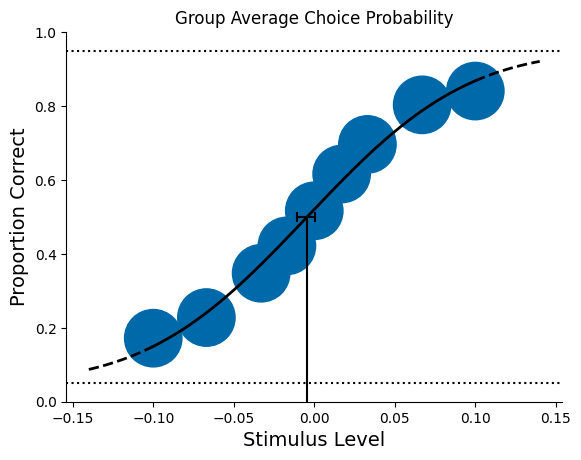

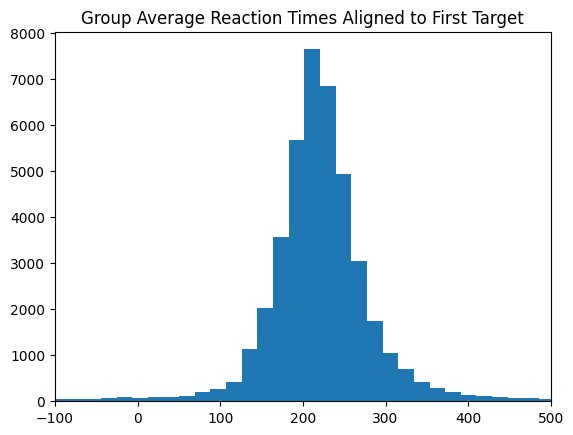

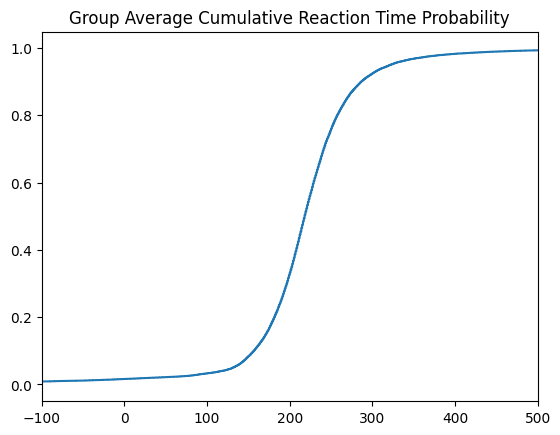

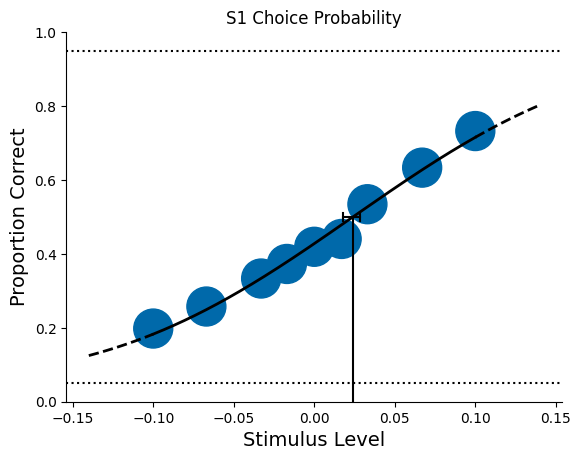

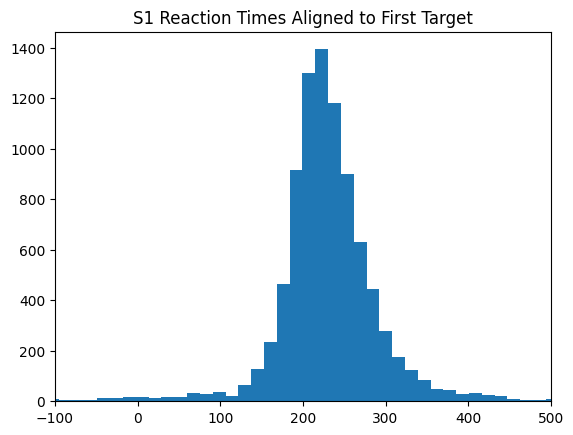

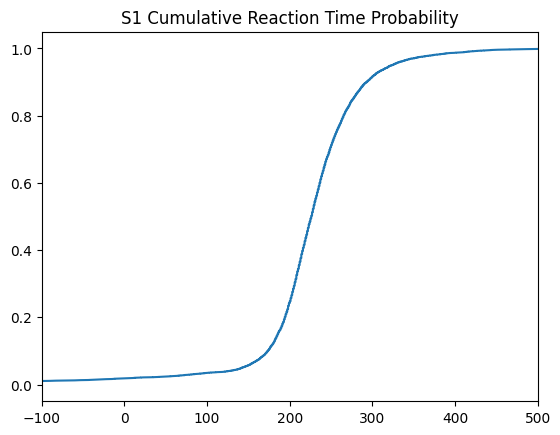

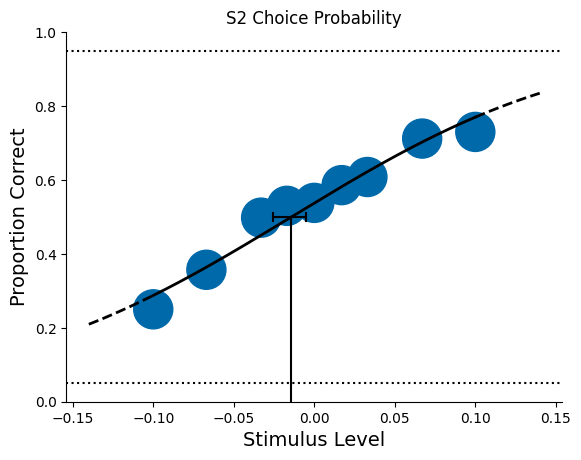

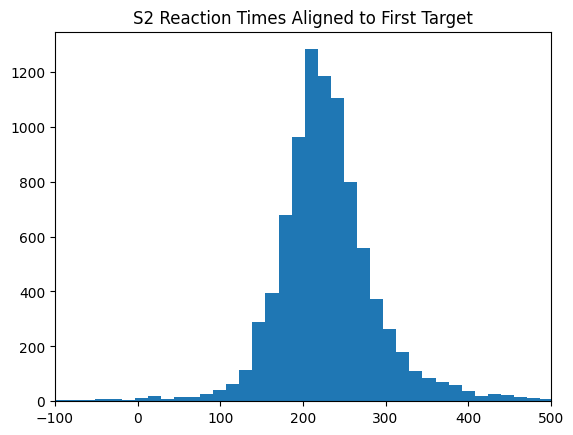

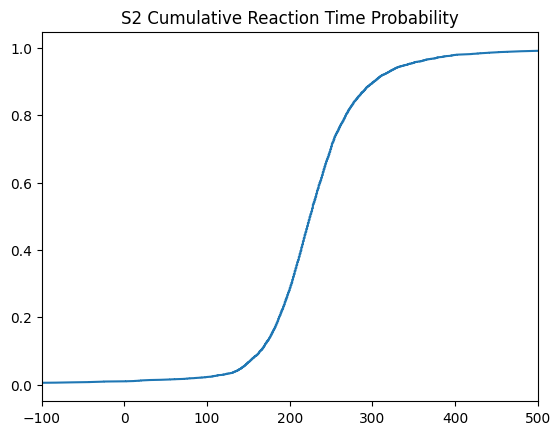

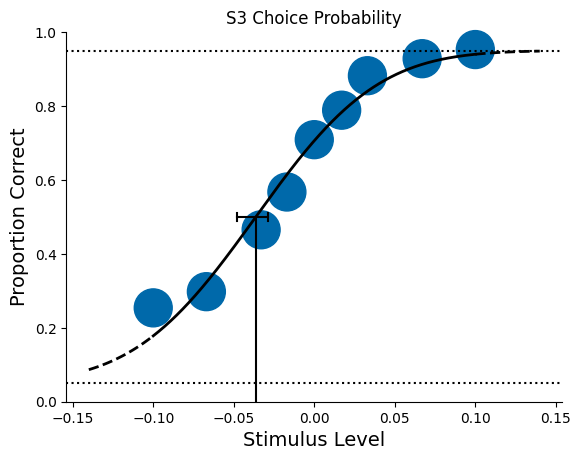

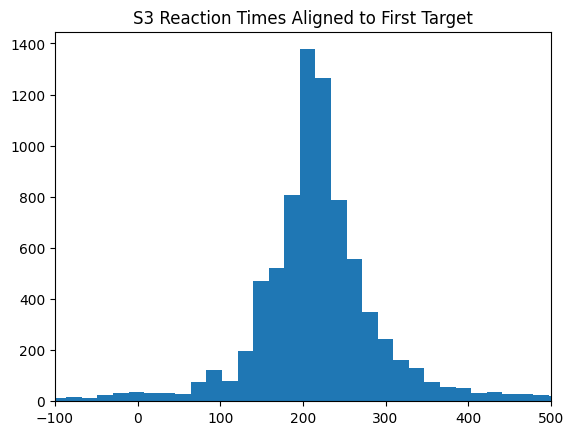

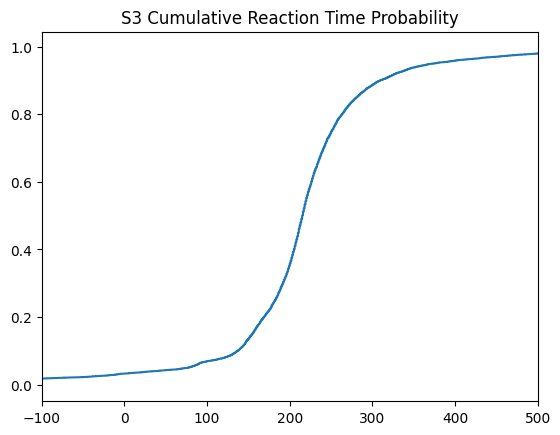

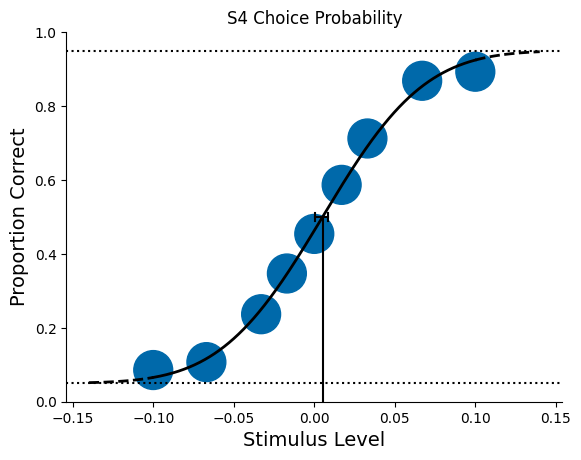

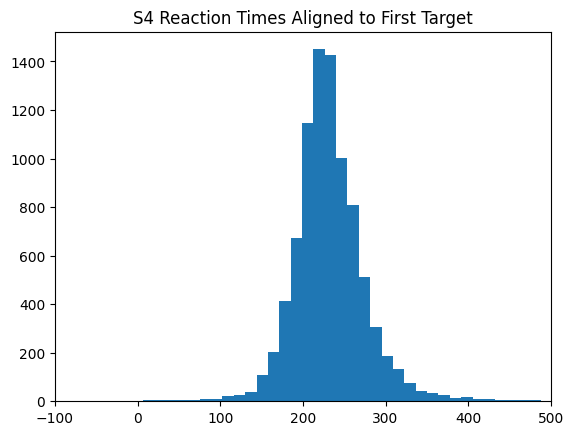

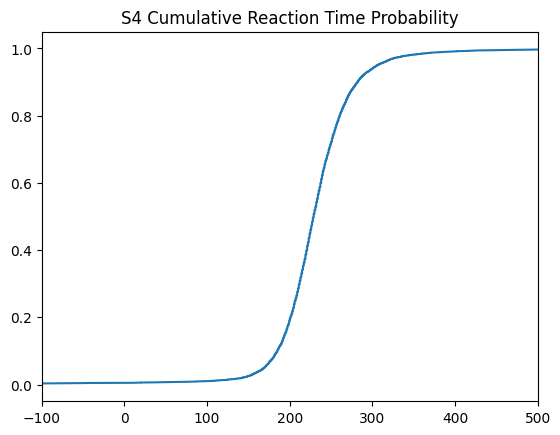

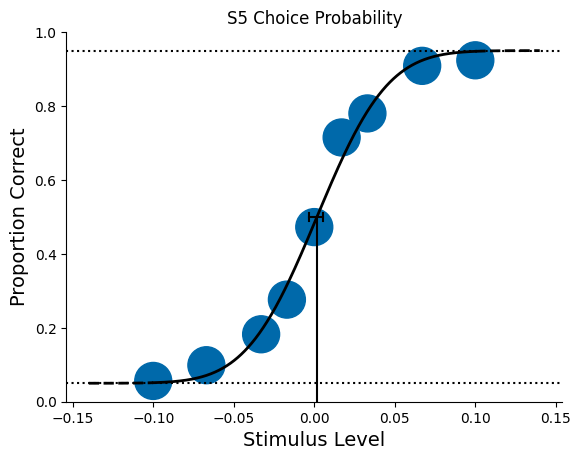

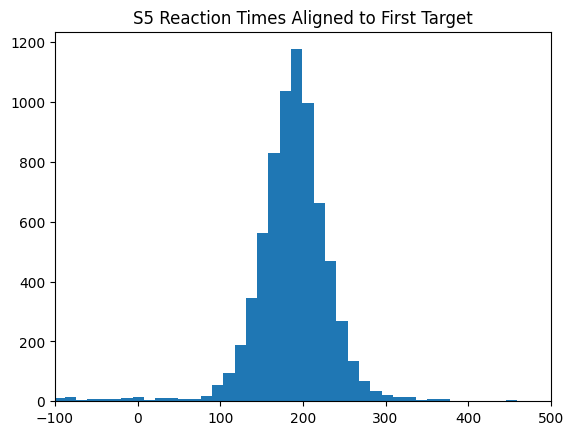

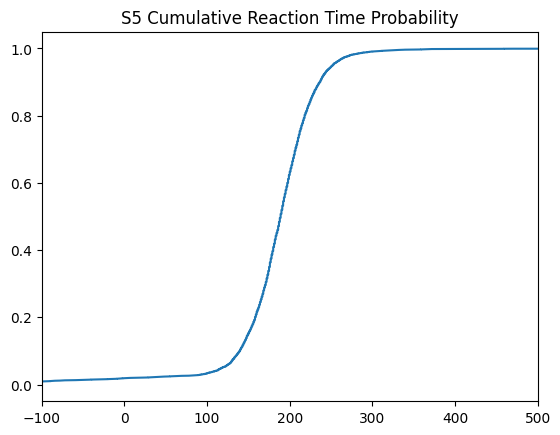

In [ ]:
## Plot individual participant data
subj_keys = ['S1', 'S2', 'S3', 'S4', 'S5']
for subj in subj_keys:
    
    subjData = behaviour.combineBehaviour(fr'{path}\Data\Behavioural', all_key = False, subj_key = subj, polarity_key = 'All', exp_key = 'All')

    plt.figure()
    ax = plt.gca()
    fit1 = behaviour.plotPsychometricFunction(subjData, plot = True)
    plt.title(f'{subj} Choice Probability')
    
    plt.figure()
    plt.hist(subjData['Reaction Time: First Target'], bins = 100)
    plt.xlim([-100, 500])
    plt.title(f'{subj} Reaction Times Aligned to First Target')

    plt.figure()
    xs, ys = behaviour.ecdf(subjData['Reaction Time: First Target'])
    plt.plot(xs, ys)
    plt.xlim([-100, 500])
    plt.title(f'{subj} Cumulative Reaction Time Probability')

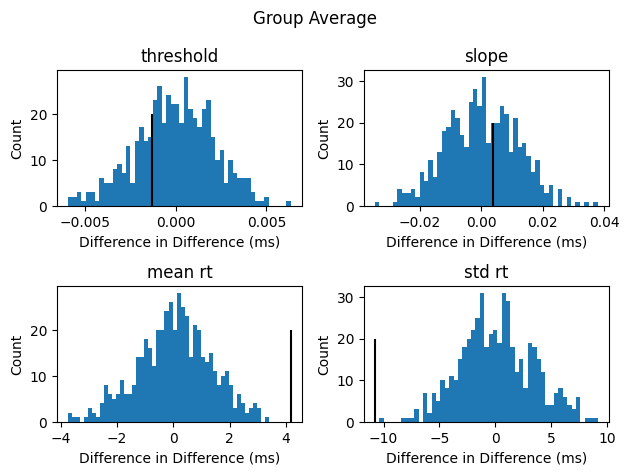

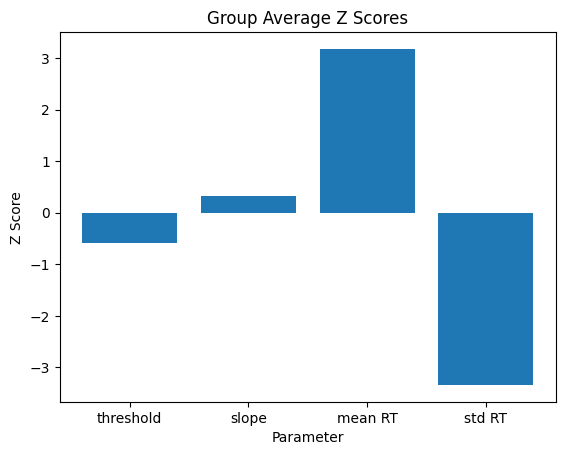

In [ ]:
true = np.load(rf'{path}\Data\Psychometric Permutations\group_average_true.npy')
null = np.load(rf'{path}\Data\Psychometric Permutations\group_average_null.npy')
DID.plotPsycPermutations(true, null, plot_title = 'Group Average')
DID.plotZscores(true, null, plot_title = 'Group Average Z Scores')



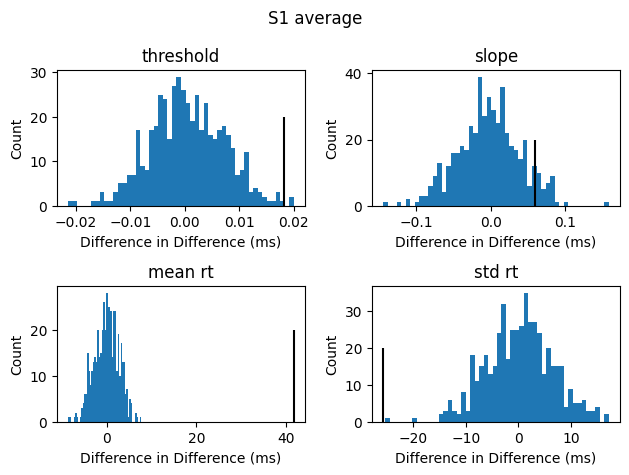

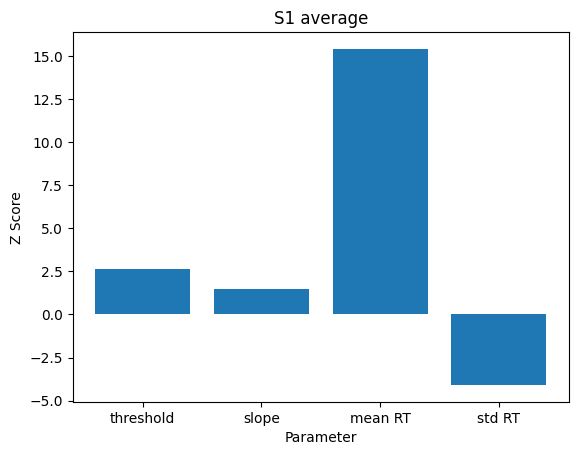

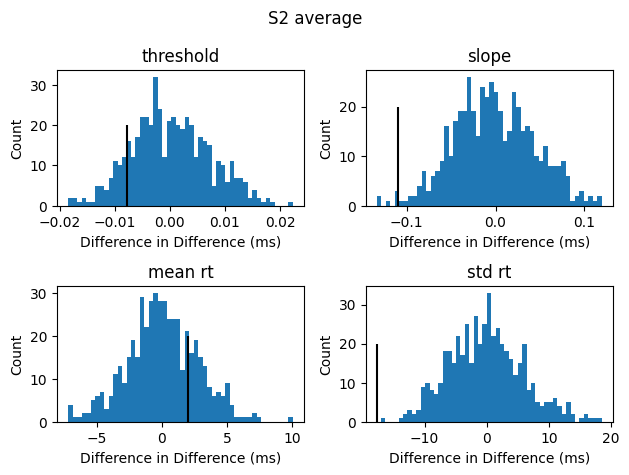

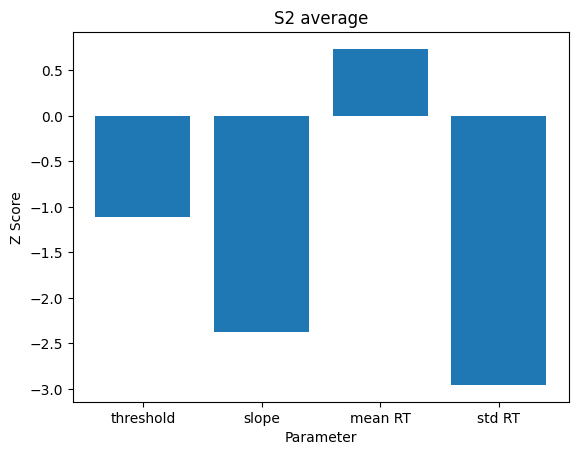

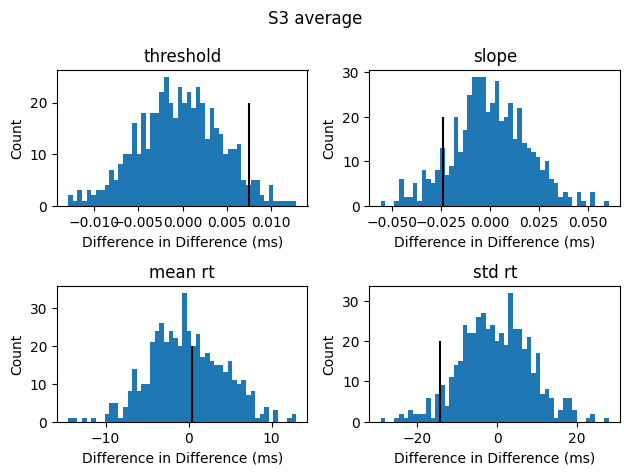

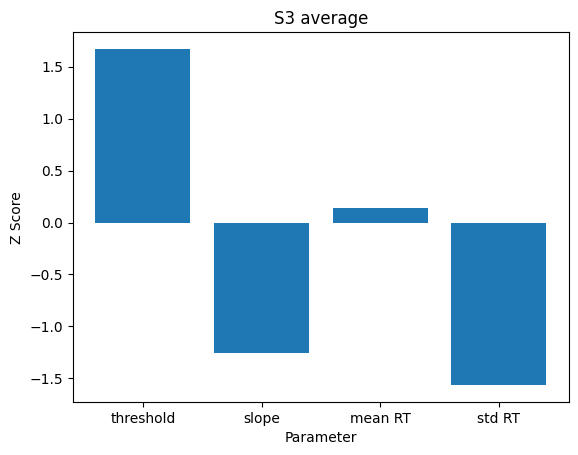

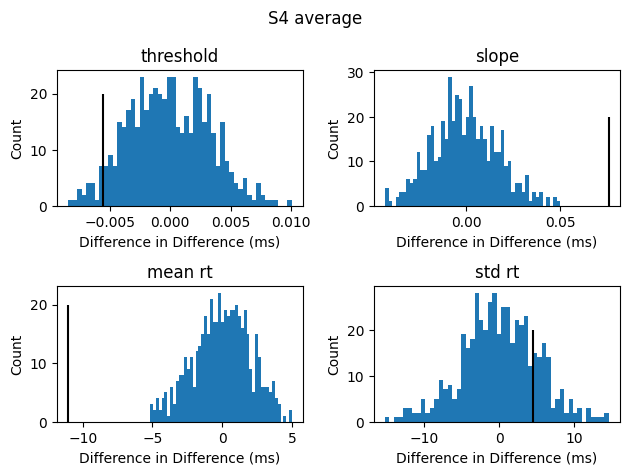

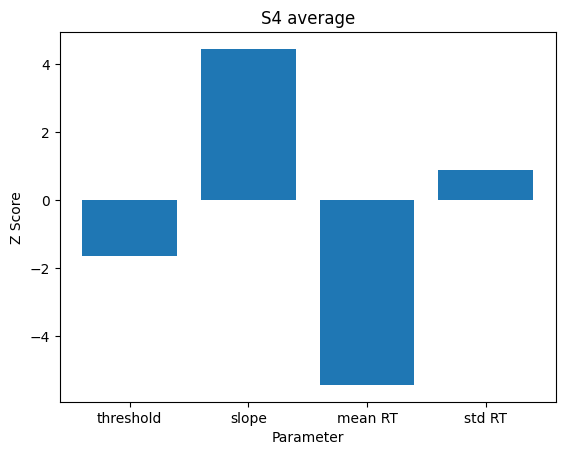

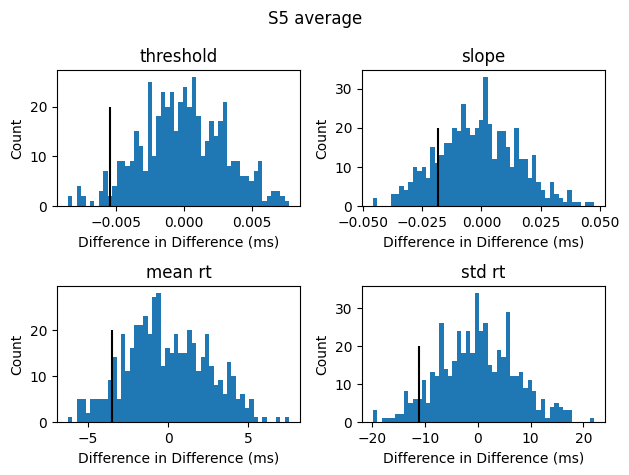

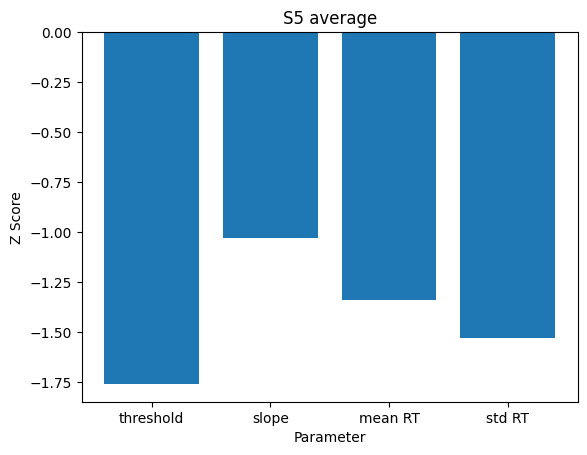

In [ ]:
for subj in subj_keys:  
    true = np.load(fr'{path}\Data\Psychometric Permutations\{subj}_average_true.npy')
    null = np.load(fr'{path}\Data\Psychometric Permutations\{subj}_average_null.npy')
    DID.plotPsycPermutations(true, null, plot_title = f'{subj} average')
    DID.plotZscores(true, null, plot_title = f'{subj} average')


e:\PhD\FEF_Public\Scripts\DifferenceInDifference.py:252: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


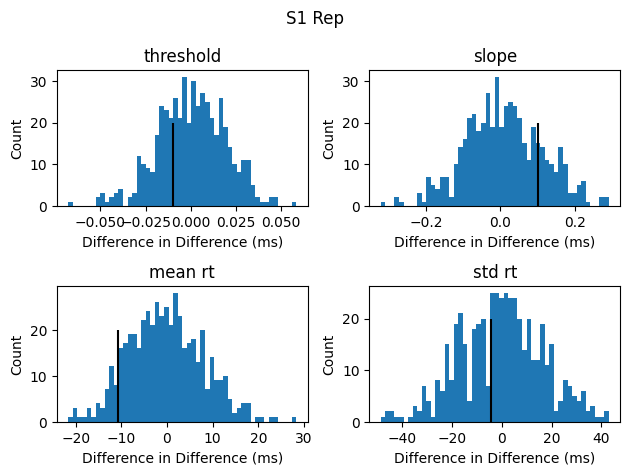

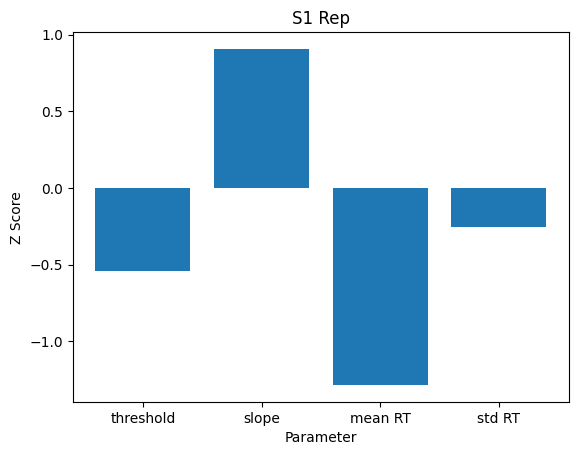

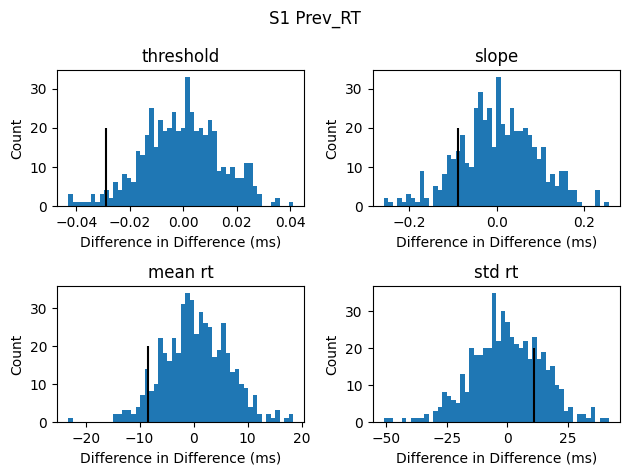

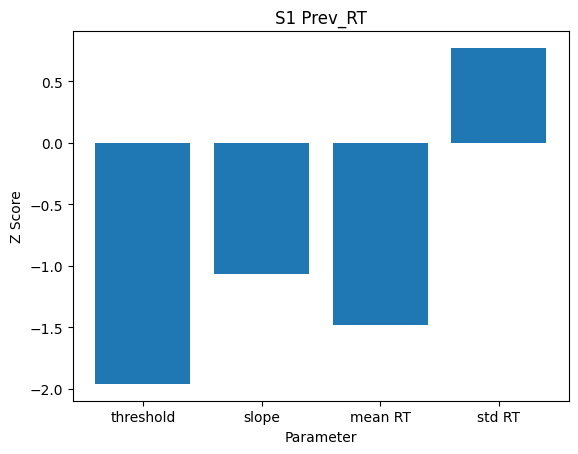

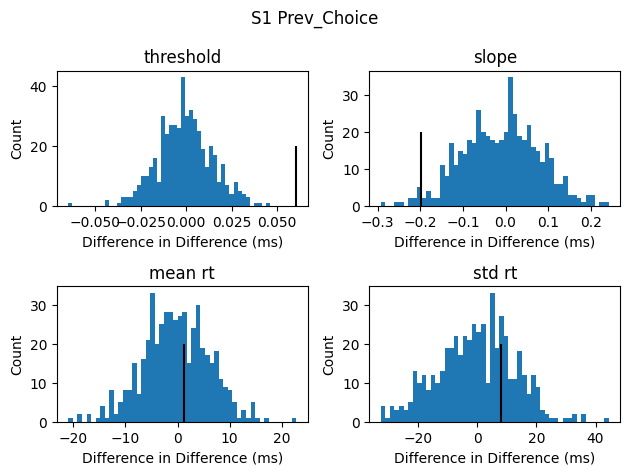

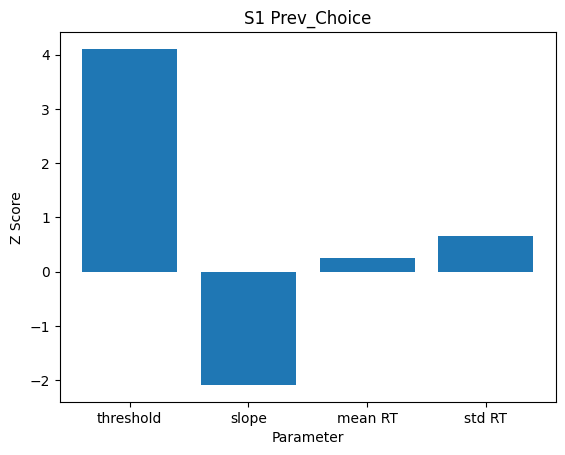

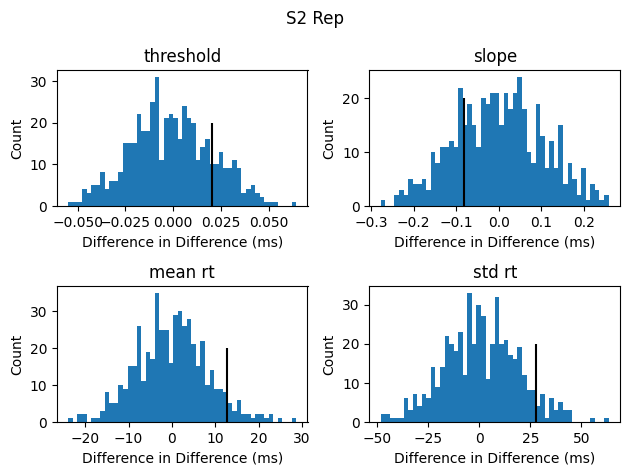

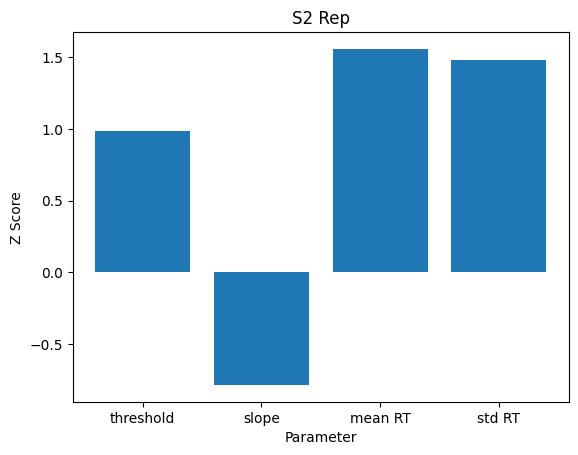

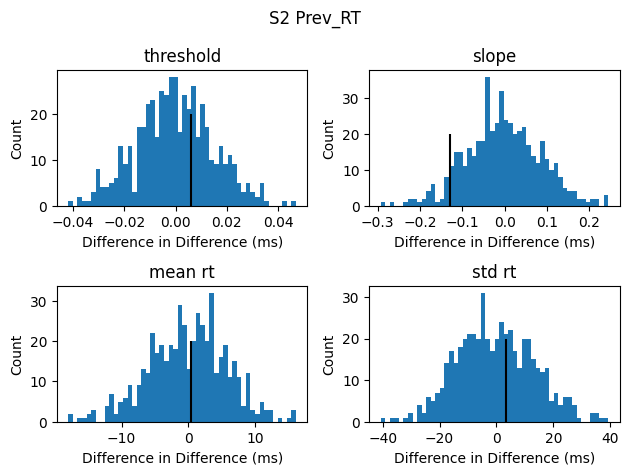

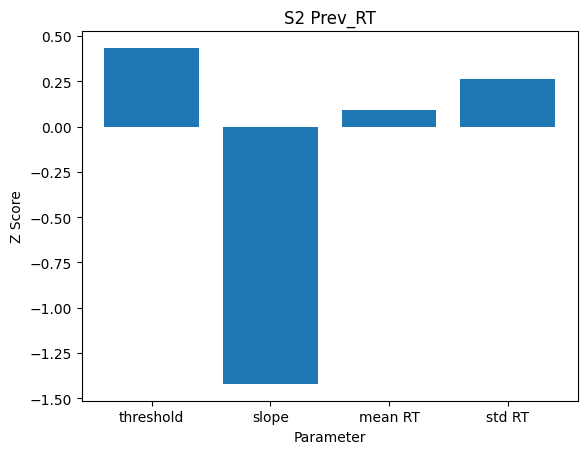

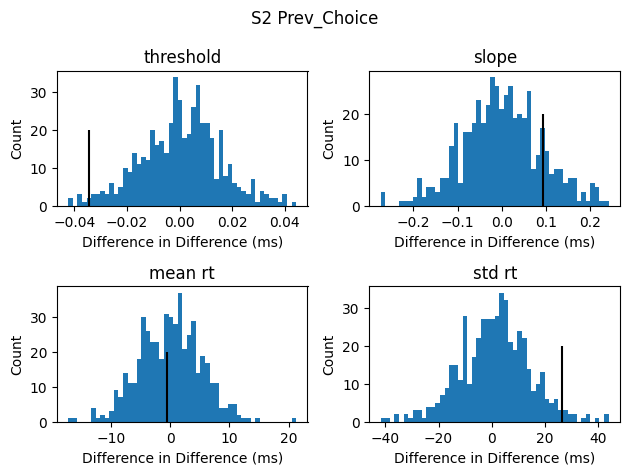

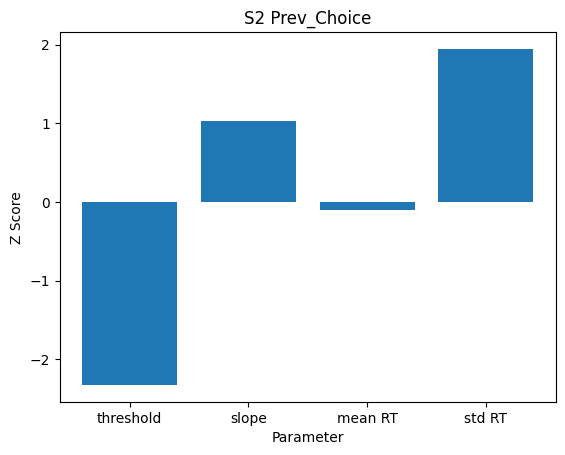

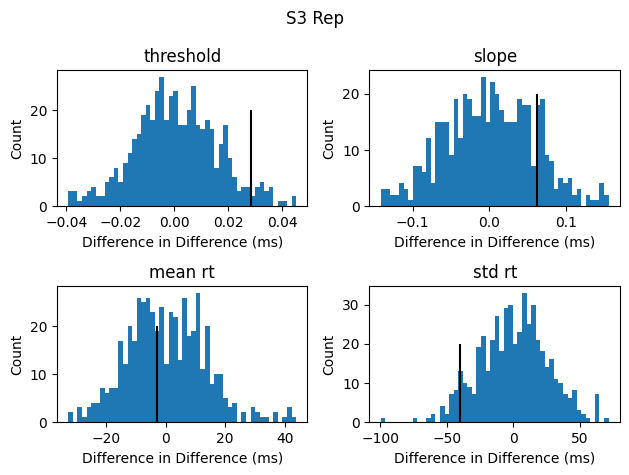

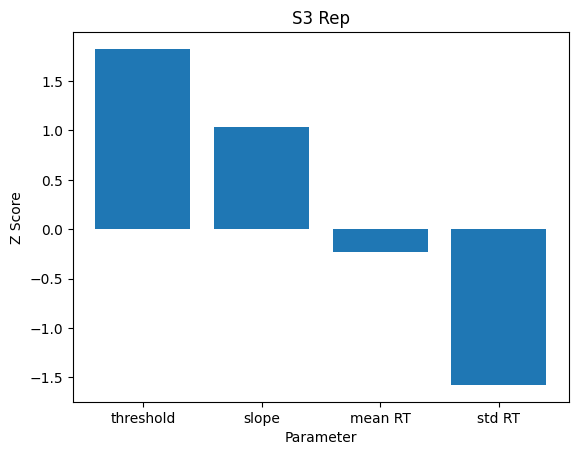

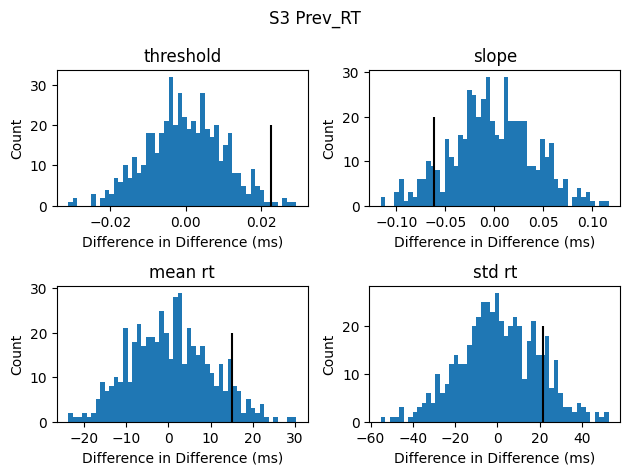

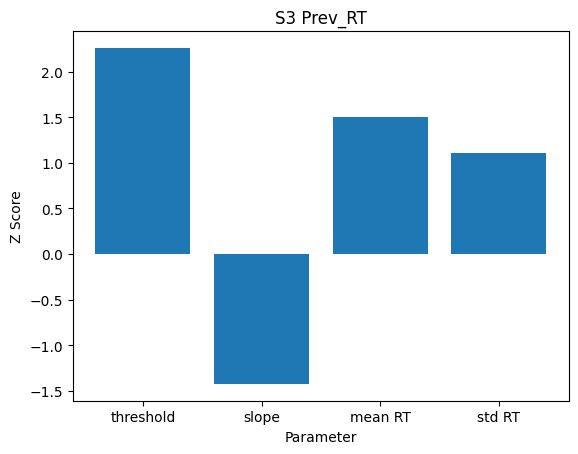

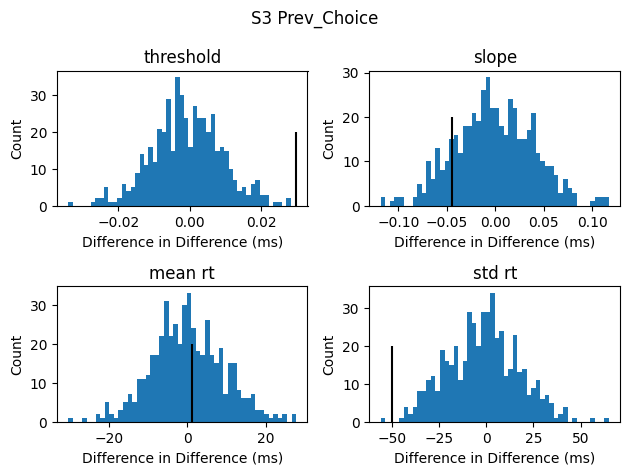

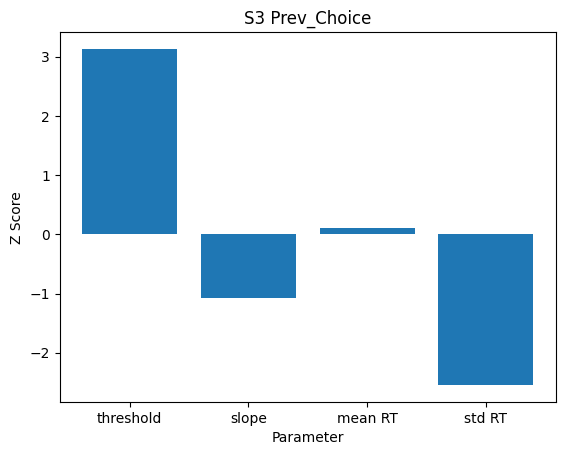

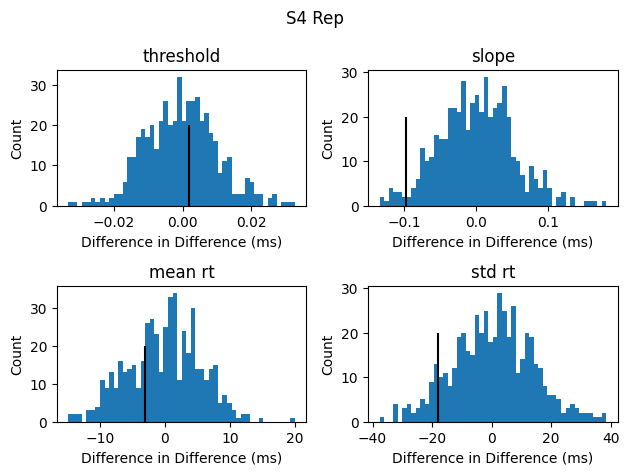

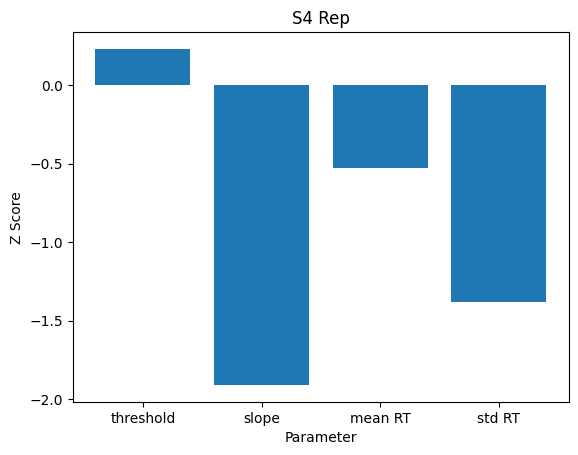

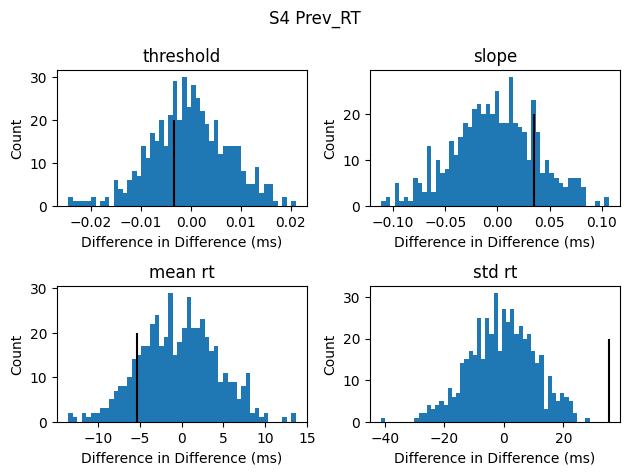

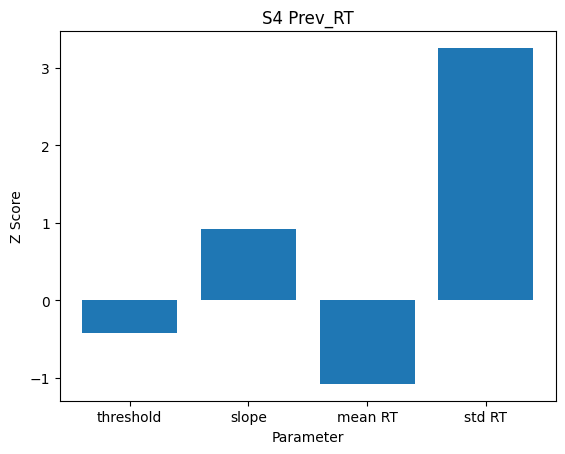

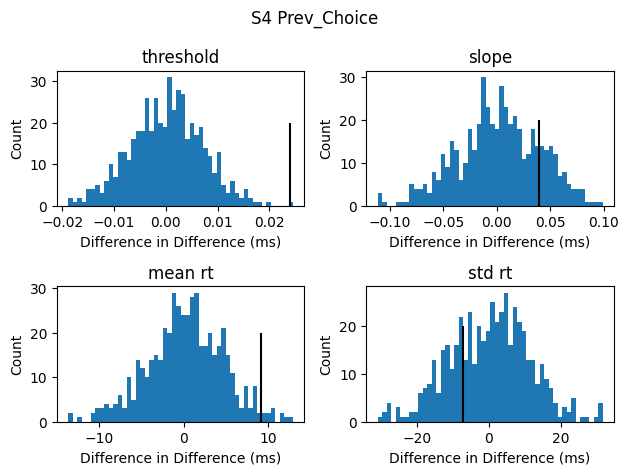

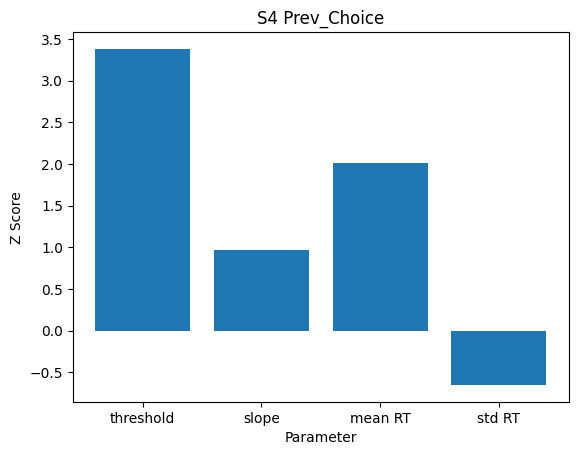

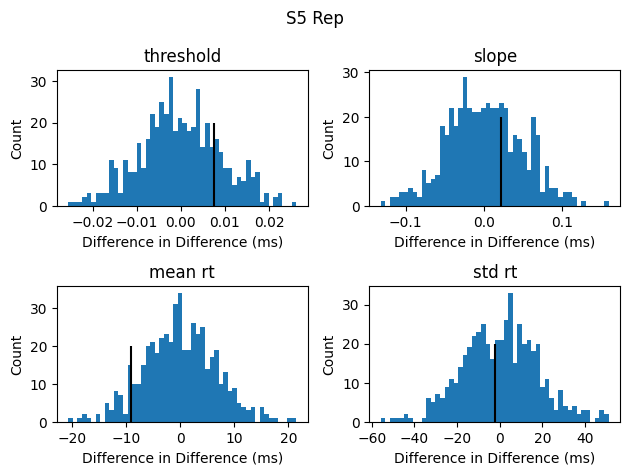

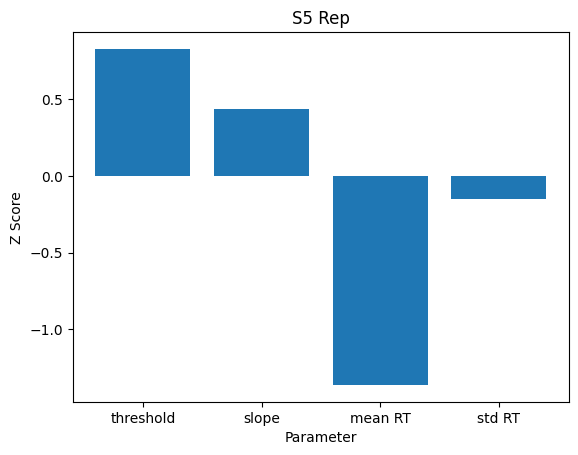

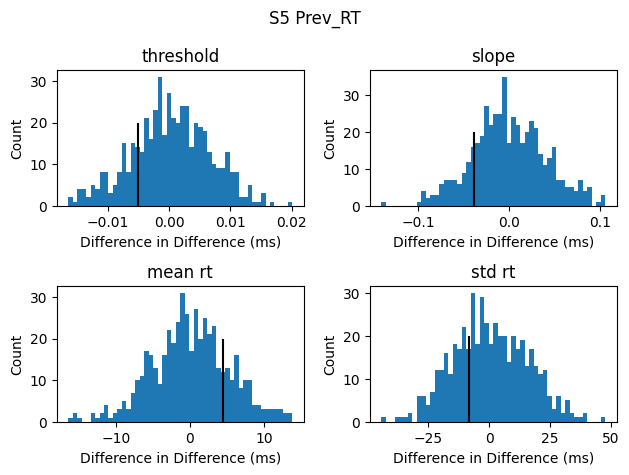

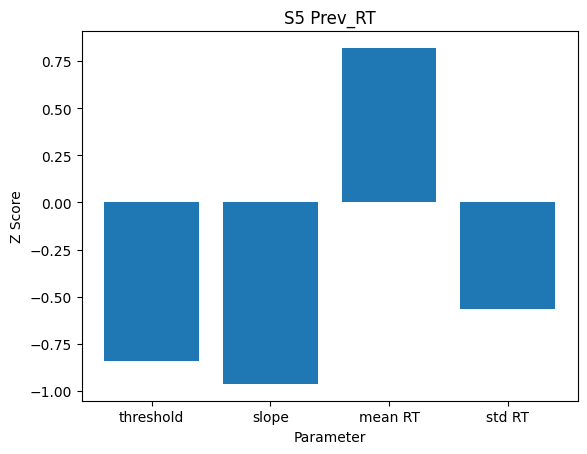

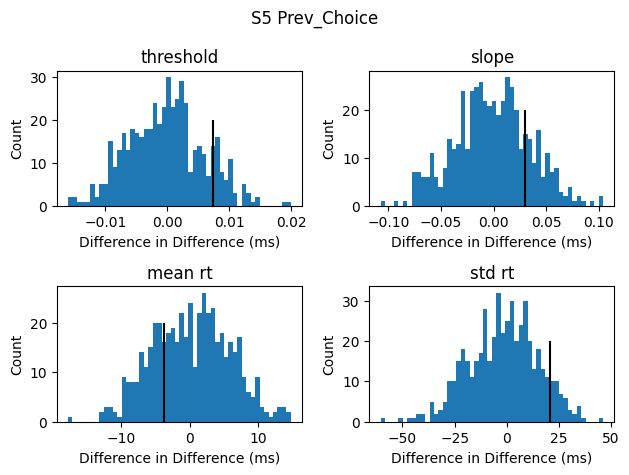

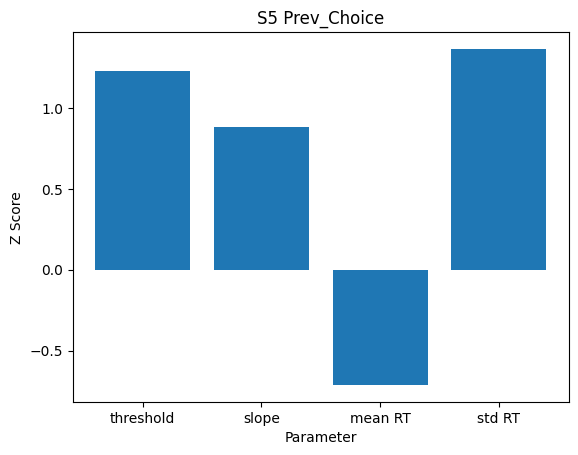

In [ ]:
data_splits = ['Rep', 'Prev_RT', 'Prev_Choice']
for subj in subj_keys:
    for split in data_splits:
        true = np.load(fr'{path}\Data\Psychometric Permutations\{subj}_{split}_true.npy')
        null = np.load(fr'{path}\Data\Psychometric Permutations\{subj}_{split}_null.npy')
        DID.plotPsycPermutations(true, null, plot_title = f'{subj} {split}')
        DID.plotZscores(true, null, plot_title = f'{subj} {split}')


+++ S1 psychometric permutation p values +++
combination 0
[0.362 0.028 0.    0.   ]
combination 1
[0.28  0.002 0.    0.   ]
combination 2
[0.392 0.344 0.    0.   ]
combination 3
[0.192 0.466 0.    0.   ]
combination 4
[0.132 0.256 0.    0.   ]
combination 5
[0.372 0.128 0.    0.   ]
combination 6
[0.194 0.    0.    0.062]
combination 7
[0.032 0.    0.204 0.   ]
combination 8
[0.264 0.004 0.    0.   ]
combination 9
[0.436 0.002 0.248 0.296]
combination 10
[0. 0. 0. 0.]
combination 11
[0.03  0.042 0.    0.01 ]
combination 12
[0.026 0.    0.002 0.044]
combination 13
[0.01 0.   0.32 0.  ]
combination 14
[0.1   0.048 0.    0.   ]
combination 15
[0.068 0.042 0.04  0.218]
combination 16
[0. 0. 0. 0.]
combination 17
[0.    0.282 0.    0.012]
combination 18
[0.35  0.012 0.    0.36 ]
combination 19
[0.106 0.    0.162 0.   ]
combination 20
[0.376 0.    0.    0.012]
combination 21
[0.406 0.    0.276 0.038]
combination 22
[0.012 0.    0.    0.028]
combination 23
[0.122 0.    0.    0.21 ]
+++++++++

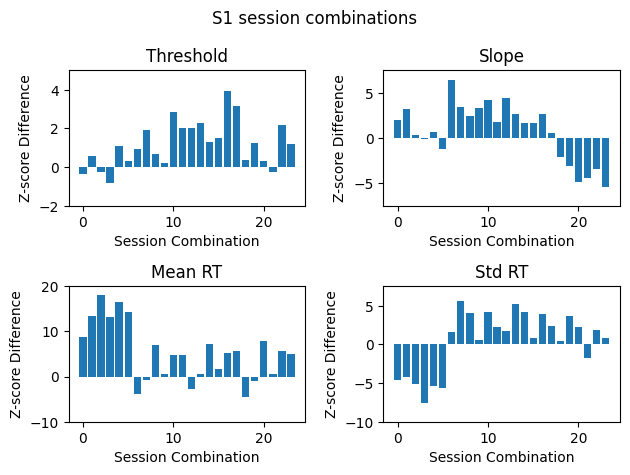

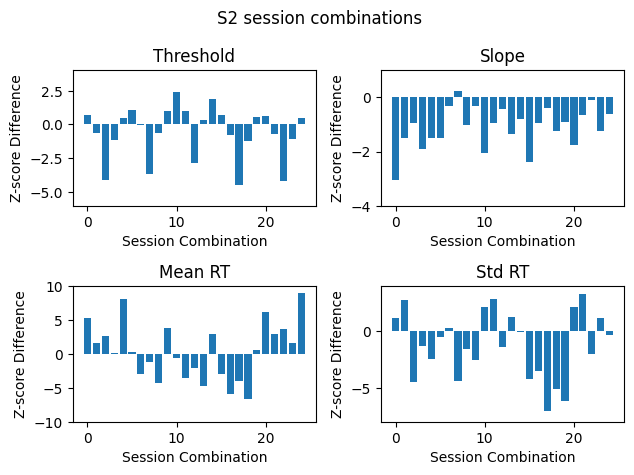

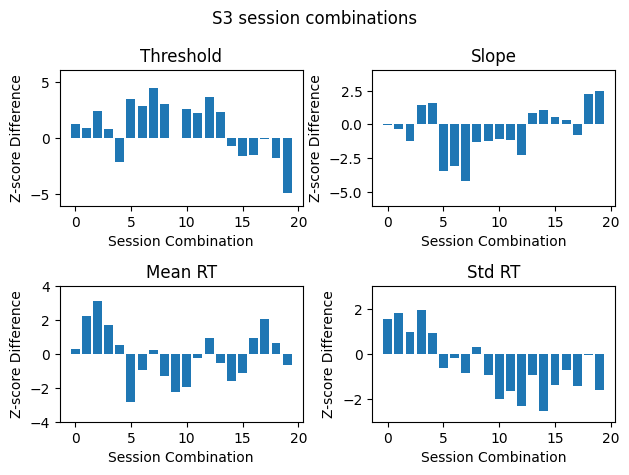

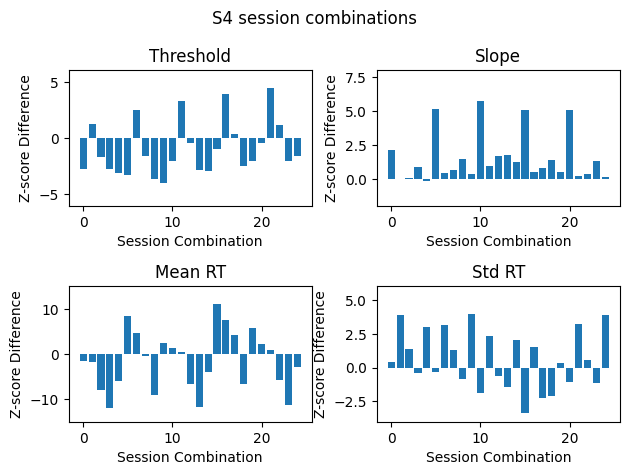

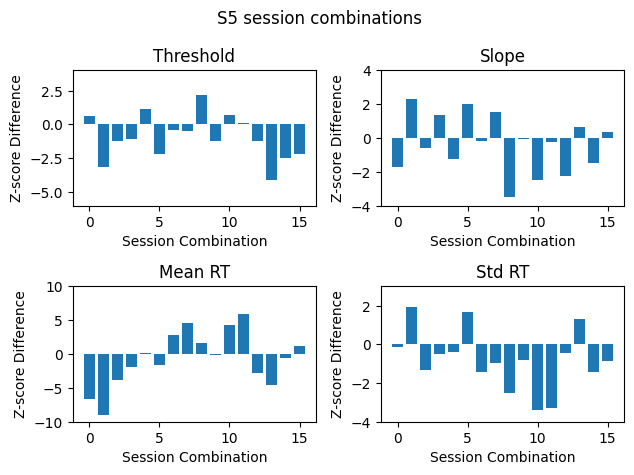

In [ ]:
## Plot session combinations...
with open(fr'{path}\Data\pre_sessions.pkl', 'rb') as f:
    pre_sessions = pickle.load(f)
DID.plotSessionCombinations(path, pre_sessions, subj_keys)